In [1]:
import pandas as pd
import numpy as np
from HullWhite import HullWhite
from scipy.optimize import fsolve
S = np.arange(0,11)
T = np.arange(0,10.5,0.5)
beta = np.array([1.879892, 0.579211, 	3.993992, 1.445091])
tau  = np.array([ 16.633491, 	0.319680])
reversion=0.08670264780833303 #0.13949636660880768 
volatility=0.013928489964789946 #0.017793899652989272
HW = HullWhite(initial=0.02459103, reversion=reversion, volatility=volatility, b=beta, tau=tau)
K=fsolve(lambda x: HW.swap(0, S, T, x), x0=0.02)[0]

In [2]:
from joblib import load, Parallel, delayed, cpu_count, dump
import seaborn as sns
import time
EPE = load('./SimulationData/PE_10Y_Swap_N=100000_dt=365.joblib')
ENE = load('./SimulationData/NE_10Y_Swap_N=100000_dt=365.joblib')
# def worker(Te):
#     return Te, HW.swaption(0,Te,S,T,K, payer=False)
# AnalyticalNESwap10Y = Parallel(n_jobs=cpu_count())(delayed(worker)(Te) for Te in np.arange(0,10+1/365,1/365))
# dump(AnalyticalNESwap10Y, './SimulationData/AnalyticalNESwap10Y.joblib')

In [3]:
PE=load('./SimulationData/AnalyticalPESwap10Y.joblib')
NE=load('./SimulationData/AnalyticalNESwap10Y.joblib')

<Axes: >

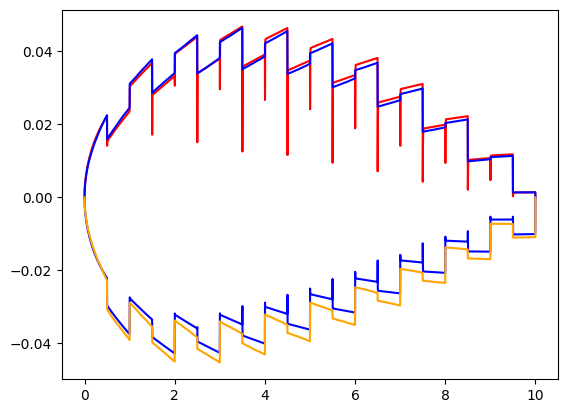

In [4]:
discounting = np.array([HW.ZCB(0,Te) for Te in np.arange(0,10+1/365,1/365)])
time = np.arange(0,10+1/365,1/365)
time2 = np.arange(0,10+2/365,2/365)
sns.lineplot(x=time,y=PE, color ="red")
sns.lineplot(x=time,y=NE, color ="blue")
sns.lineplot(x=time,y=discounting*np.array(EPE), color='blue')
sns.lineplot(x=time,y=discounting*np.array(ENE), color='orange')


In [12]:
from defaultCurves import *
CVA(time, 1, PE)*1000000, DVA(time, 1, NE)*1000000

(-6013.497771913147, 3582.638978547404)

In [13]:
EPE = load('./SimulationData/PE_10Y_Swap_N=100000_dt=365.joblib')
ENE = load('./SimulationData/NE_10Y_Swap_N=100000_dt=365.joblib')

In [14]:
CVA(time, 1, EPE)*1000000, DVA(time, 1, ENE)*1000000

(-6889.578371139134, 4510.185848775185)